In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from os.path import expanduser
import re
from nltk.stem.porter import PorterStemmer

In [34]:
stop_words = [word.strip() for word in open('stop_words.txt').readlines()]

In [35]:
len(stop_words)


572

In [36]:
def stemming_tokenizer(str_input):
    porter_stemmer = PorterStemmer()
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [37]:
with open('dems.txt', 'r',encoding="utf-8") as file:
    dem_text = [line.strip('\n') for line in file]
with open('gop.txt', 'r',encoding="utf-8") as file:
    gop_text = [line.strip('\n') for line in file]
with open('NonPolitical.txt', 'r',encoding="utf-8") as file:
    nonp_text = [line.strip('\n') for line in file]

In [57]:
vectorizer = CountVectorizer(input=dem_text + gop_text + nonp_text,
                             stop_words=stop_words,
                             max_features=1200,tokenizer=stemming_tokenizer,ngram_range=(1,2))

In [58]:
dem_bow = vectorizer.fit_transform(dem_text)
gop_bow = vectorizer.fit_transform(gop_text)
nonp_bow = vectorizer.fit_transform(nonp_text)

In [59]:
#%%
(dem_bow.shape, gop_bow.shape, nonp_bow.shape)
#%%

((19373, 1200), (18978, 1200), (12913, 1200))

In [60]:
x = sparse.vstack((dem_bow, gop_bow, nonp_bow))
ones = np.ones(19373)
zeros = np.zeros(18978)
twos = np.full(12913,2)
y = np.hstack((ones, zeros, twos))

In [71]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


nb = MultinomialNB()


# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state = 42) 
  
# training a KNNClassifier 
model=nb.fit(X_train, y_train)
y_predictions = model.predict(X_test) 




In [72]:
class_names = ['Democrats','Republicans','Non-Political']


In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, x, y, cv=10)
scores
print("CV score mean: %0.2f " % (scores.mean()))

CV score mean: 0.93 


In [74]:
accuracy_score(y_test, y_predictions)

ValueError: Found input variables with inconsistent numbers of samples: [5126, 12816]

In [65]:
y_test1 = np.zeros([len(y_test),3], int)
for i in range(0,len(y_test)):
        y_test1[i, int(y_test[i])] =1

In [66]:
y_score = np.zeros([len(y_test),3], int)
for i in range(0,len(y_predictions)):
        y_score[i, int(y_predictions[i])] =1

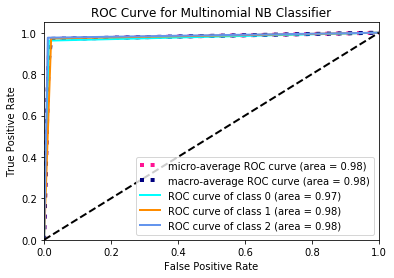

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw=2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial NB Classifier')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[4521  117   62]
 [  89 4705   45]
 [  28   51 3198]]
Normalized confusion matrix
[[0.96191489 0.02489362 0.01319149]
 [0.01839223 0.97230833 0.00929944]
 [0.0085444  0.01556301 0.97589258]]


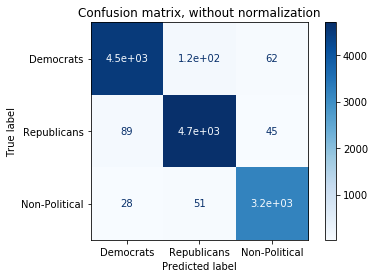

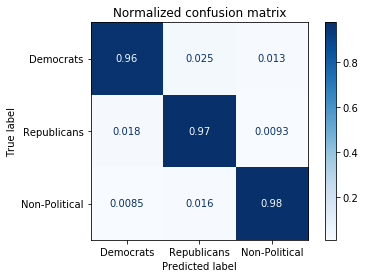

In [68]:
#PLotting confusion matrix for decision tree classification
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,display_labels=class_names, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()